In [1]:
##################################
#            Q1                  #
##################################
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(color_codes=True)

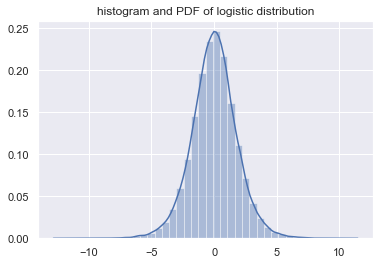

In [2]:
################ Q1-a ###################
def logistic ():
    u = random.uniform (0, 1)
    return math.log(u/(1-u))
sample=[]
for i in range(100000):
    sample.append(logistic())
sns.distplot(sample,bins=40)
plt.title('histogram and PDF of logistic distribution')
plt.show()

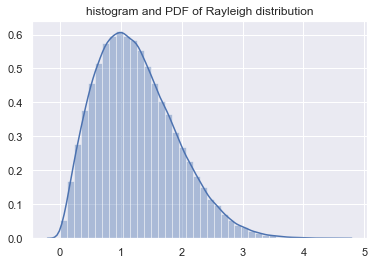

In [3]:
################ Q1-b ###################
def RayleighDistri():
    U = random.uniform(0, 1)
    X = math.sqrt(-2*math.log(1-U))
    return X
sample=[]
for i in range(100000):
    sample.append(RayleighDistri())
sns.distplot(sample,bins=40)
plt.title('histogram and PDF of Rayleigh distribution')
plt.show()

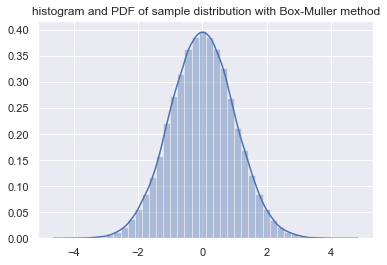

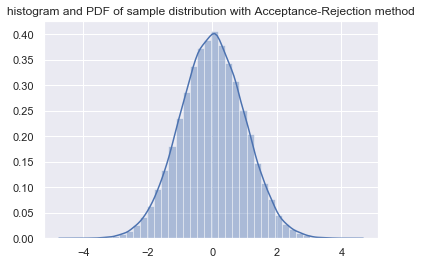

In [4]:
################ Q1-c ###################
def BoxMuller():
            U1 = random.uniform(0,1)
            U2 = random.uniform(0,1)
            X = math.sqrt(-2*math.log(U1,math.e))*math.cos(2*math.pi*U2)
            Y = math.sqrt(-2*math.log(U1,math.e))*math.sin(2*math.pi*U2)
            return X,Y
sample=[]
for i in range(100000):
    sample.append(BoxMuller()[0])
sns.distplot(sample,bins=40)
plt.title('histogram and PDF of sample distribution with Box-Muller method')
plt.show()
#Generate y using inverse transform method
def ExpoDistri():
    U = random.uniform(0,1)
    Y = -math.log(U)
    return Y
#Decide whether accept or reject generated samples
def AcceptanceRejection():
    flag = 0
    while flag==0:
        Y = ExpoDistri()
        U = random.uniform(0,1)
        if  U < math.exp(-0.5*((Y-1)**2)):
            X = Y
            flag=1
    if random.random() > 0.5:
        X = -X
    return X
sample=[]
for i in range(100000):
    sample.append(AcceptanceRejection())
sns.distplot(sample,bins=40)
plt.title('histogram and PDF of sample distribution with Acceptance-Rejection method')
plt.show()

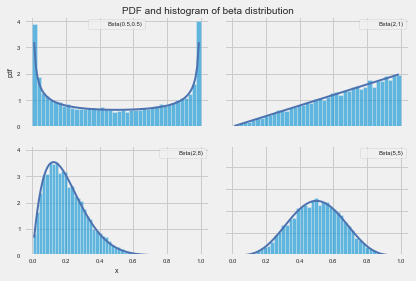

In [6]:
################ Q1-d ###################
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import gamma
plt.style.use('fivethirtyeight')

def BetaConst(a,b):
    return quad(lambda x:(x**(a-1))*((1-x)**(b-1)),0,1)[0]
def BetaDistri(a,b):
    x = 1
    y = 1
    while x+y > 1:
        u = random.uniform(0,1)
        v = random.uniform(0,1)
        x = u**(1/a)
        y = v**(1/b)
    return x/(x+y)

params_a = [0.5, 2, 2, 5]
params_b = [0.5, 1, 8, 5]
sample=[[] for i in range(4)]
for i in range(10000):
    sample[0].append(BetaDistri(params_a[0],params_b[0]))
    sample[1].append(BetaDistri(params_a[1],params_b[1]))
    sample[2].append(BetaDistri(params_a[2],params_b[2]))
    sample[3].append(BetaDistri(params_a[3],params_b[3]))

x=np.arange(0.01,1,0.01)
f, ax = plt.subplots(2, 2, sharex=True, sharey=True)
adict={0:[0,0],1:[0,1],2:[1,0],3:[1,1]}
for i in range(4):
    j=adict[i][0]
    k=adict[i][1]
    a = params_a[i]
    b = params_b[i]
    pdf = stats.beta.pdf(x,a,b)
    ax[j,k].hist(sample[i],density=True,bins=40,alpha=0.6)
    ax[j,k].plot(x, pdf,'b',linewidth=2)
        
    ax[j,k].plot(0, 0, label='Beta({},{})'.format(a, b), alpha=0)
    plt.setp(ax[j,k], xticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0], yticks=[0,1,2,3,4,5])
    labels = ax[j,k].get_xticklabels() + ax[j,k].get_yticklabels()
    [label.set_fontsize(6) for label in labels]
    ax[j,k].legend(fontsize=6)
ax[1,0].set_xlabel('x', fontsize=7)
ax[0,0].set_ylabel('pdf', fontsize=7)
plt.suptitle('PDF and histogram of beta distribution', fontsize=10)
plt.tight_layout()
plt.show()

In [7]:
##################################
#            Q2                  #
##################################
import random
from scipy import stats
import numpy as np
import math

In [8]:
################ Q2-a ###################
#number of samples that are larger than 8
count=0
#total number of generated samples
total_sample=1000000
X=np.random.normal(loc=0,scale=1.0,size=total_sample)
for i in X:
    if i>8:
        count+=1
print('tail probability P(X>8) is: ',count/total_sample)

tail probability P(X>8) is:  0.0


In [9]:
################ Q2-b ###################
mu,sigma=8,1
#total number of generated samples
total_sample=1000000
X=np.random.normal(loc=mu,scale=sigma,size=total_sample)
tailProb=0
for i in X:
    if i>8:
        tailProb+=math.exp(0.5*(mu**2)-mu*i)
print('tail probability P(X>8) is: ',tailProb/total_sample)

tail probability P(X>8) is:  6.212186625347357e-16


In [10]:
##################################
#            Q7                  #
##################################
const0=1#365!
for i in range(1,366):
    const0*=i
def factorial(n):
    const=1#365!
    for i in range(1,n+1):
        const*=i
    return const

expect=0
for i in range(1,367):
# for i in range(1,3):
    const1=const0/((365**(i-1))*(factorial(366-i)))
    expect+=const1
print("expectation : ",expect)

expectation :  24.616585894598856
